## IMPORTING THE LIBRARIES

In [1506]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## IMPORTING THE DATASET

In [1509]:
data=pd.read_csv("Employee.csv")
data.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [1511]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


## Question 1: Data Exploration
## Explore the data, list down the unique values in each feature and find its length.Perform the statistical analysis and renaming of the columns

In [1514]:
unique_values = {col: data[col].dropna().unique().tolist() for col in data.columns}
unique_counts = {col: len(data[col].dropna().unique()) for col in data.columns}
for col, values in unique_values.items():
    print(f"{col}: {unique_counts[col]} unique values -> {values}\n")

Company: 6 unique values -> ['TCS', 'Infosys', 'CTS', 'Tata Consultancy Services', 'Congnizant', 'Infosys Pvt Lmt']

Age: 29 unique values -> [20.0, 30.0, 35.0, 40.0, 23.0, 34.0, 45.0, 18.0, 22.0, 32.0, 37.0, 50.0, 21.0, 46.0, 36.0, 26.0, 41.0, 24.0, 25.0, 43.0, 19.0, 38.0, 51.0, 31.0, 44.0, 33.0, 17.0, 0.0, 54.0]

Salary: 40 unique values -> [2300.0, 3000.0, 4000.0, 5000.0, 6000.0, 7000.0, 8000.0, 9000.0, 1089.0, 1234.0, 3030.0, 3045.0, 3184.0, 4824.0, 5835.0, 7084.0, 8943.0, 8345.0, 9284.0, 9876.0, 2034.0, 7654.0, 2934.0, 4034.0, 5034.0, 8202.0, 9024.0, 4345.0, 6544.0, 6543.0, 3234.0, 4324.0, 5435.0, 5555.0, 8787.0, 3454.0, 5654.0, 5009.0, 5098.0, 3033.0]

Place: 11 unique values -> ['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin', 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune']

Country: 1 unique values -> ['India']

Gender: 2 unique values -> [0, 1]



In [1516]:
length_unique=data.nunique()
print ("Length of unique values\n",length_unique)

Length of unique values
 Company     6
Age        29
Salary     40
Place      11
Country     1
Gender      2
dtype: int64


In [1520]:
data.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [1522]:
data.rename(columns={
                 'Company':'Company_Name',
                 'Age':'Emp_Age',
                 'Salary':'Emp_Salary',
                 'Place':'Location',
                 'Country':'Country_Name',
                 'Gender':'Sex'
                 },inplace=True)

In [1524]:
data.head()

,Company_Name,Emp_Age,Emp_Salary,Location,Country_Name,Sex
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


# Question 2 :Data Cleaning
## Find the missing and inappropriate values, treat them appropriately.Remove all duplicate rows.Find the outliers.Replace the value 0 in age as NaN
## Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)


In [1527]:
data.isnull().sum()

Company_Name     8
Emp_Age         18
Emp_Salary      24
Location        14
Country_Name     0
Sex              0
dtype: int64

In [1529]:
# Checking for duplicate rows
data.duplicated().sum()

4

In [1531]:
# Displaying duplicate rows
duplicate_rows = data[data.duplicated()]
print(duplicate_rows)

    Company_Name  Emp_Age  Emp_Salary  Location Country_Name  Sex
84           CTS     43.0         NaN    Mumbai        India    0
130          TCS     21.0      4824.0    Mumbai        India    0
131      Infosys      NaN      5835.0    Mumbai        India    0
144      Infosys     22.0      8787.0  Calcutta        India    1


In [1533]:
# removing duplicate rows
data.drop_duplicates(inplace=True)

In [1535]:
 # Checking for duplicate rows after removing
data.duplicated().sum()

0

In [1537]:
data['Emp_Age']=data['Emp_Age'].replace(0,np.nan)

In [1539]:
# After replacing value of age as NaN

data.iloc[101:115]

,Company_Name,Emp_Age,Emp_Salary,Location,Country_Name,Sex
102,CTS,44.0,NaN,Mumbai,India,0
103,CTS,22.0,2934.0,Calcutta,India,0
104,Infosys,44.0,4034.0,Delhi,India,0
105,TCS,33.0,5034.0,Mumbai,India,0
106,Infosys,22.0,8202.0,Cochin,India,1
107,TCS,NaN,9024.0,Chennai,India,1
108,TCS,33.0,NaN,Mumbai,India,0
109,NaN,33.0,NaN,Calcutta,India,0
110,TCS,33.0,2300.0,Delhi,India,0
111,Infosys,NaN,3234.0,Mumbai,India,0


In [1541]:
# Outlier for Emp_Age
Q1 = data['Emp_Age'].quantile(0.25)
Q3= data['Emp_Age'].quantile(0.75)
IQR= Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3+ 1.5 * IQR

print("Emp_Age Outliers")
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

outliers_age = data[(data['Emp_Age'] < lower_bound) | (data['Emp_Age'] > upper_bound)]

Emp_Age Outliers
Q1: 23.0
Q3: 40.0
IQR: 17.0
Lower Bound: -2.5
Upper Bound: 65.5


In [1543]:
Q1 = data['Emp_Salary'].quantile(0.25)
Q3= data['Emp_Salary'].quantile(0.75)
IQR= Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3+ 1.5 * IQR

print("Emp_Salary Outliers")
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

Emp_Salary Outliers
Q1: 3030.0
Q3: 8000.0
IQR: 4970.0
Lower Bound: -4425.0
Upper Bound: 15455.0


In [1708]:
data.isnull().sum()

Company_Name    0
Emp_Age         0
Emp_Salary      0
Location        0
Country_Name    0
Sex             0
dtype: int64

In [1547]:
data['Emp_Age'].fillna(data['Emp_Age'].median(),inplace=True)              # Numerical column null value is replaced with median
data['Emp_Salary'].fillna(data['Emp_Salary'].median(),inplace=True)        # Numerical column null value is replaced with median
data['Company_Name'].fillna(data['Company_Name'].mode()[0],inplace=True)   # Categorical column null value is replaced with mode.
                                                                           # mode() return a series frequent value. To get first most frequent.
data['Location'].fillna(data['Location'].mode()[0],inplace=True)           # Categorical column null value is replaced with mode

C:\Users\sam00\AppData\Local\Temp\ipykernel_2956\1864434096.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Emp_Age'].fillna(data['Emp_Age'].median(),inplace=True)              # Numerical column null value is replaced with median
C:\Users\sam00\AppData\Local\Temp\ipykernel_2956\1864434096.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the interme

# Question 3 :Data Analysis
## Filter the data with age >40 and salary<5000
## Plot the chart with age and salary
## Count the number of people from each place and represent it visually

In [1550]:
filtered_data = data[(data['Emp_Age'] > 40) & (data['Emp_Salary'] < 5000)]
print("Data with Age > 40 & Salary < 5000):")
print(filtered_data)

Data with Age > 40 & Salary < 5000):
    Company_Name  Emp_Age  Emp_Salary   Location Country_Name  Sex
21       Infosys     50.0      3184.0      Delhi        India    0
32       Infosys     45.0      4034.0   Calcutta        India    0
39       Infosys     41.0      3000.0     Mumbai        India    0
50       Infosys     41.0      3000.0    Chennai        India    0
57       Infosys     51.0      3184.0  Hyderabad        India    0
68       Infosys     43.0      4034.0     Mumbai        India    0
75       Infosys     44.0      3000.0     Cochin        India    0
86       Infosys     41.0      3000.0      Delhi        India    0
93       Infosys     54.0      3184.0     Mumbai        India    0
104      Infosys     44.0      4034.0      Delhi        India    0
122      Infosys     44.0      3234.0     Mumbai        India    0
129      Infosys     50.0      3184.0   Calcutta        India    0
138          CTS     44.0      3033.0     Cochin        India    0
140      Infosys     44.0

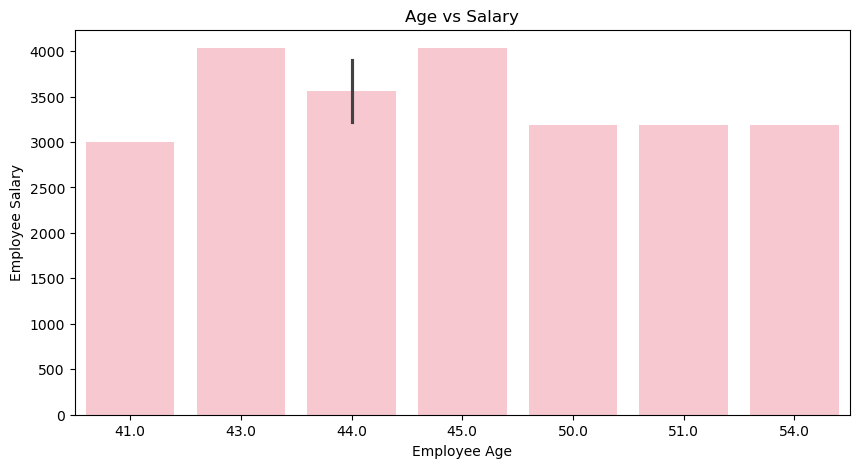

In [1589]:
plt.figure(figsize=(10, 5))
sns.barplot(data=filtered_data, x='Emp_Age',y='Emp_Salary', color='pink')
plt.title('Age vs Salary')
plt.xlabel('Employee Age')
plt.ylabel('Employee Salary')
plt.show()

In [1591]:
count_of_people=data['Location'].value_counts()
print("Count of people location wise :\n",count_of_people)

Count of people location wise :
 Location
Mumbai        48
Calcutta      32
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64


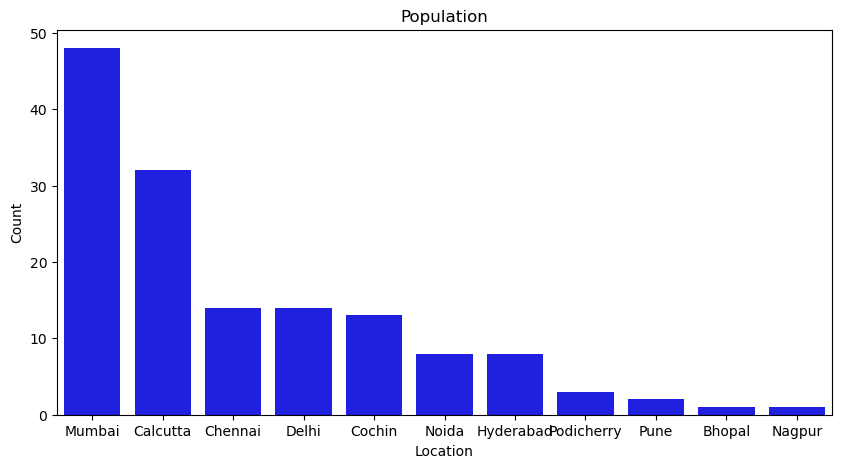

In [1593]:
plt.figure(figsize=(10, 5))
sns.barplot(x=count_of_people.index, y=count_of_people.values,color='blue')
plt.title('Population')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

# Question 4: Data Encoding
## Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.


## OneHotEncoding

In [1680]:
# 1.Importing libarary

# for xtrain and x test splitting
from sklearn.model_selection import train_test_split

# for One hot encoding
from sklearn.preprocessing import OneHotEncoder


In [1682]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company_Name  144 non-null    object 
 1   Emp_Age       144 non-null    float64
 2   Emp_Salary    144 non-null    float64
 3   Location      144 non-null    object 
 4   Country_Name  144 non-null    object 
 5   Sex           144 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.9+ KB


In [1684]:
# 2.Classifying the variables

categorical_features = ['Company_Name','Location','Country_Name']
numerical_features = ['Emp_Age','Emp_Salary']


In [1686]:
# 3.Splitting the dataset to X and y
X = data.drop(columns = ['Sex']) 
y = data['Sex']

In [1688]:
X.head()


,Company_Name,Emp_Age,Emp_Salary,Location,Country_Name
0,TCS,20.0,5000.0,Chennai,India
1,Infosys,30.0,5000.0,Mumbai,India
2,TCS,35.0,2300.0,Calcutta,India
3,Infosys,40.0,3000.0,Delhi,India
4,TCS,23.0,4000.0,Mumbai,India


In [1690]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Sex, dtype: int64

In [1692]:
# 4.Splitting to train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [1694]:
# 5.one hot encoding
ohe = OneHotEncoder(sparse_output=False) # one hot encoder
X_train_cat = X_train[categorical_features]
X_test_cat = X_test[categorical_features]


X_train_cat_encoded = ohe.fit_transform(X_train_cat)
X_test_cat_encoded = ohe.transform(X_test_cat)

In [1696]:
X_train_num = X_train[numerical_features]
X_test_num = X_test[numerical_features]

In [1698]:
# 6. After encoding
demo_features = ohe.get_feature_names_out(categorical_features)
X_train_view = pd.DataFrame(X_train_cat_encoded, columns = demo_features)
X_train_view.head()

,Company_Name_CTS,Company_Name_Congnizant,Company_Name_Infosys,Company_Name_Infosys Pvt Lmt,Company_Name_TCS,Company_Name_Tata Consultancy Services,Location_Bhopal,Location_Calcutta,Location_Chennai,Location_Cochin,Location_Delhi,Location_Hyderabad,Location_Mumbai,Location_Nagpur,Location_Noida,Location_Podicherry,Location_Pune,Country_Name_India
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


# Label Encoding

In [1701]:
# 1.Importing libarary

from sklearn.preprocessing import LabelEncoder

In [1703]:
# Encoding categorical features
categorical_features = ['Company_Name','Location','Country_Name']
data_encoded=data.copy()
for col in categorical_features:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])

In [1705]:
# After encoding
cat_label_encode= pd.concat(
    [data[categorical_features], data_encoded[categorical_features]],
    axis=1
)
cat_label_encode

,Company_Name,Location,Country_Name,Company_Name,Location,Country_Name
0,TCS,Chennai,India,4,2,0
1,Infosys,Mumbai,India,2,6,0
2,TCS,Calcutta,India,4,1,0
3,Infosys,Delhi,India,2,4,0
4,TCS,Mumbai,India,4,6,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,Mumbai,India,3,6,0
143,TCS,Calcutta,India,4,1,0
145,Infosys,Delhi,India,2,4,0
146,TCS,Mumbai,India,4,6,0


# Question 5:Feature Scaling
## After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.


In [1668]:
# 1. Importing libaray
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [1670]:

# 2.Select the numerical features
numerical_features = ['Emp_Age', 'Emp_Salary']

# Standard Scaling

In [1673]:
scaler_standard = StandardScaler()
standard_scaled_data[numerical_features] = scaler_standard.fit_transform(data[numerical_features])

In [1675]:
print("Standard Scaled Data:")
print(standard_scaled_data[numerical_features].head())

Standard Scaled Data:
    Emp_Age  Emp_Salary
0 -1.484676   -0.100827
1 -0.267174   -0.100827
2  0.341577   -1.243735
3  0.950328   -0.947426
4 -1.119426   -0.524127


# MinMax Scaling


In [1678]:

scaler_minmax = MinMaxScaler()
minmax_scaled_data[numerical_features] = scaler_minmax.fit_transform(data[numerical_features])

In [1637]:
print("MinMax Scaled Data:")
print(minmax_scaled_data[numerical_features].head())

MinMax Scaled Data:
    Emp_Age  Emp_Salary
0  0.081081    0.445089
1  0.351351    0.445089
2  0.486486    0.137817
3  0.621622    0.217480
4  0.162162    0.331285
